# 🔄 2단계: 정규화 효과 비교 분석

## 📋 목표
- StandardScaler 적용 전/후 성능 비교
- 정규화가 각 특성에 미치는 영향 분석 
- 모델 수렴 속도 비교

## 📊 분석 내용
1. 원본 데이터 분포 확인
2. StandardScaler를 통한 정규화
3. 정규화 전/후 특성 분포 비교
4. Linear Regression 모델 성능 비교
5. 학습 속도 및 수렴성 분석

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from font_setup import setup_korean_font
setup_korean_font()

✅ 한글 폰트 설정 완료: Malgun Gothic


'Malgun Gothic'

In [2]:
# 데이터 로드
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target
feature_names = california_housing.feature_names

print("📊 California Housing Dataset 정보")
print(f"특성 수: {X.shape[1]}")
print(f"샘플 수: {X.shape[0]}")
print(f"특성 이름: {feature_names}")

# DataFrame 생성
df = pd.DataFrame(X, columns=feature_names)
df['MedHouseVal'] = y
df.head()

📊 California Housing Dataset 정보
특성 수: 8
샘플 수: 20640
특성 이름: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 1️⃣ 원본 데이터 분포 확인

In [3]:
# 원본 데이터의 기본 통계량
print("📈 원본 데이터 기본 통계량")
print("=" * 50)
print(df.describe())

📈 원본 데이터 기본 통계량
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692

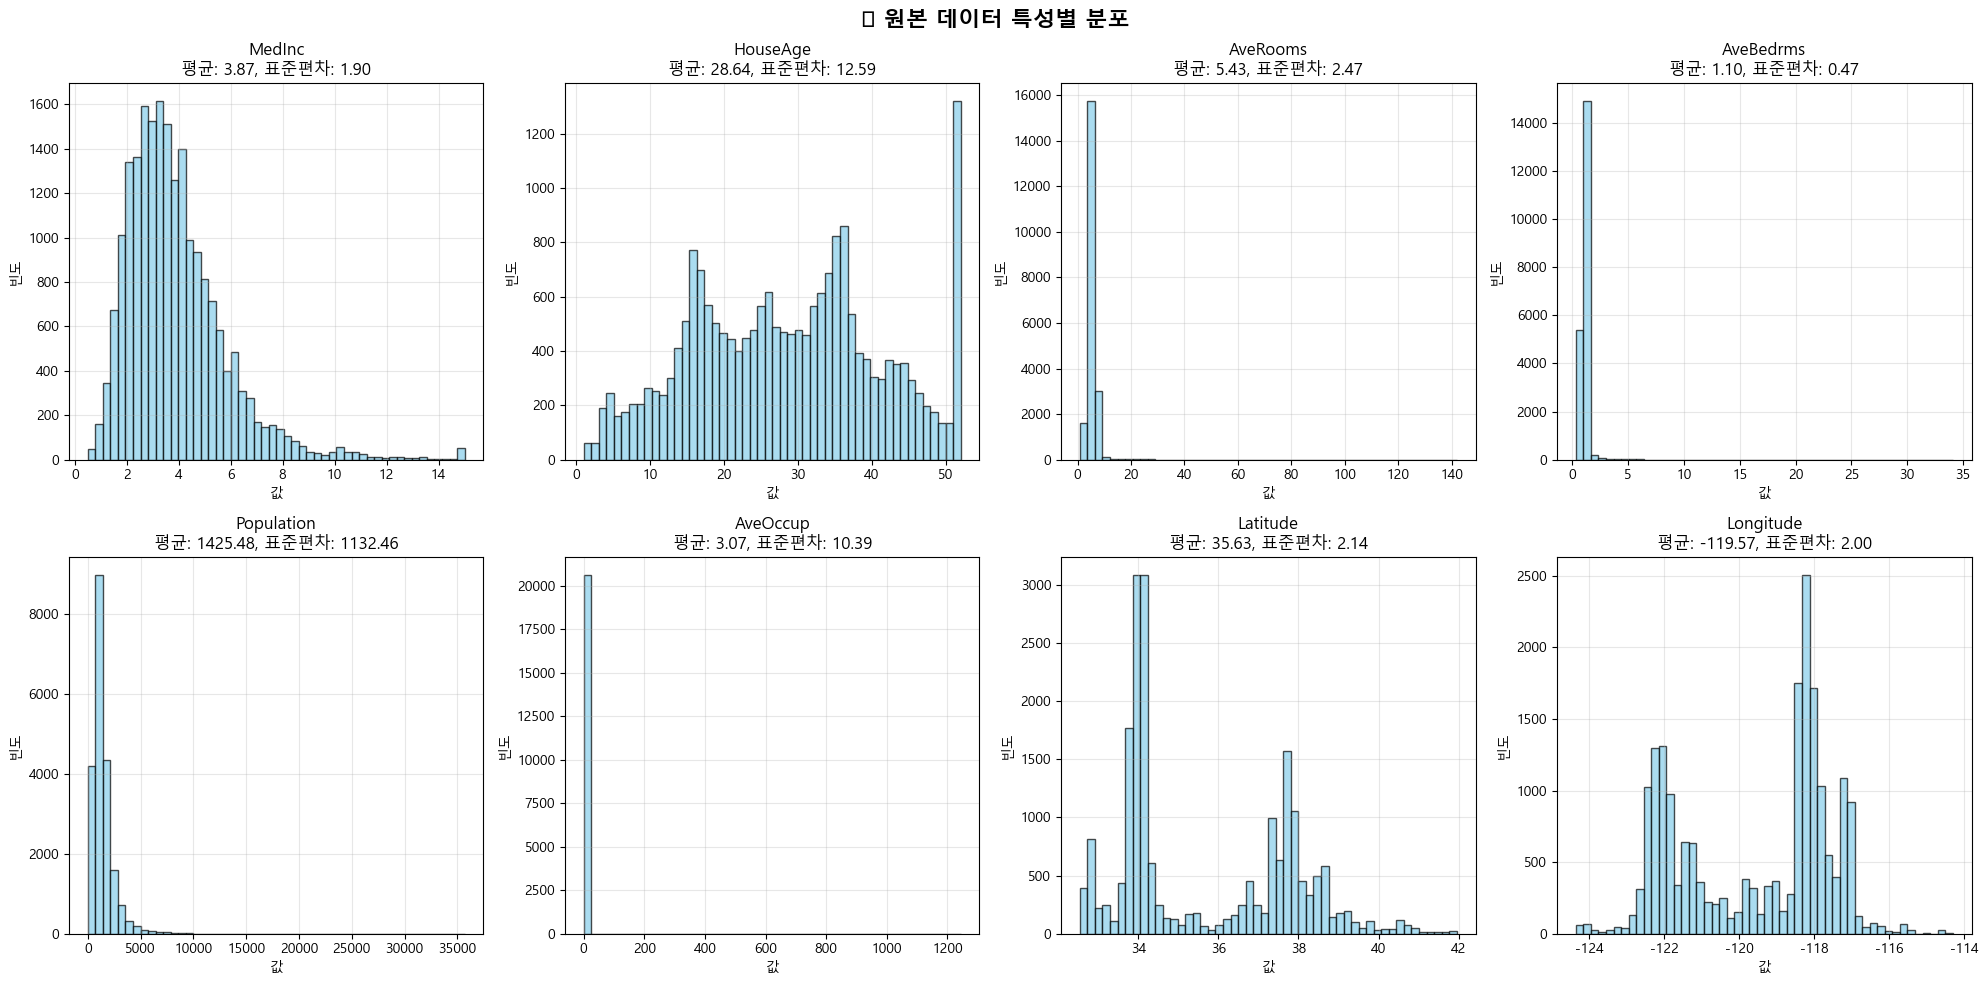

In [4]:
# 특성별 분포 시각화 (정규화 전)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('🔍 원본 데이터 특성별 분포', fontsize=16, fontweight='bold')

for i, feature in enumerate(feature_names):
    row = i // 4
    col = i % 4
    
    # 히스토그램
    axes[row, col].hist(df[feature], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'{feature}\n평균: {df[feature].mean():.2f}, 표준편차: {df[feature].std():.2f}')
    axes[row, col].set_xlabel('값')
    axes[row, col].set_ylabel('빈도')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2️⃣ 데이터 분할 및 정규화

In [5]:
# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"📊 데이터 분할 결과")
print(f"훈련 데이터: {X_train.shape[0]}개 샘플")
print(f"테스트 데이터: {X_test.shape[0]}개 샘플")
print(f"분할 비율: {X_train.shape[0]/(X_train.shape[0] + X_test.shape[0])*100:.1f}% / {X_test.shape[0]/(X_train.shape[0] + X_test.shape[0])*100:.1f}%")

📊 데이터 분할 결과
훈련 데이터: 16512개 샘플
테스트 데이터: 4128개 샘플
분할 비율: 80.0% / 20.0%


In [6]:
# StandardScaler를 사용한 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("🔄 StandardScaler 적용 완료")
print(f"정규화 전 훈련 데이터 범위:")
print(f"  최솟값: {X_train.min(axis=0)}")
print(f"  최댓값: {X_train.max(axis=0)}")
print(f"\n정규화 후 훈련 데이터 범위:")
print(f"  최솟값: {X_train_scaled.min(axis=0).round(3)}")
print(f"  최댓값: {X_train_scaled.max(axis=0).round(3)}")
print(f"  평균: {X_train_scaled.mean(axis=0).round(3)}")
print(f"  표준편차: {X_train_scaled.std(axis=0).round(3)}")

🔄 StandardScaler 적용 완료
정규화 전 훈련 데이터 범위:
  최솟값: [   0.4999        1.            0.88888889    0.33333333    3.
    0.69230769   32.55       -124.35      ]
  최댓값: [ 1.50001000e+01  5.20000000e+01  1.41909091e+02  2.56363636e+01
  3.56820000e+04  1.24333333e+03  4.19500000e+01 -1.14310000e+02]

정규화 후 훈련 데이터 범위:
  최솟값: [-1.775 -2.191 -1.904 -1.762 -1.252 -0.208 -1.448 -2.377]
  최댓값: [  5.839   1.856  57.167  56.647  30.127 107.116   2.952   2.629]
  평균: [-0. -0.  0. -0. -0. -0.  0. -0.]
  표준편차: [1. 1. 1. 1. 1. 1. 1. 1.]


## 3️⃣ 정규화 전/후 특성 분포 비교

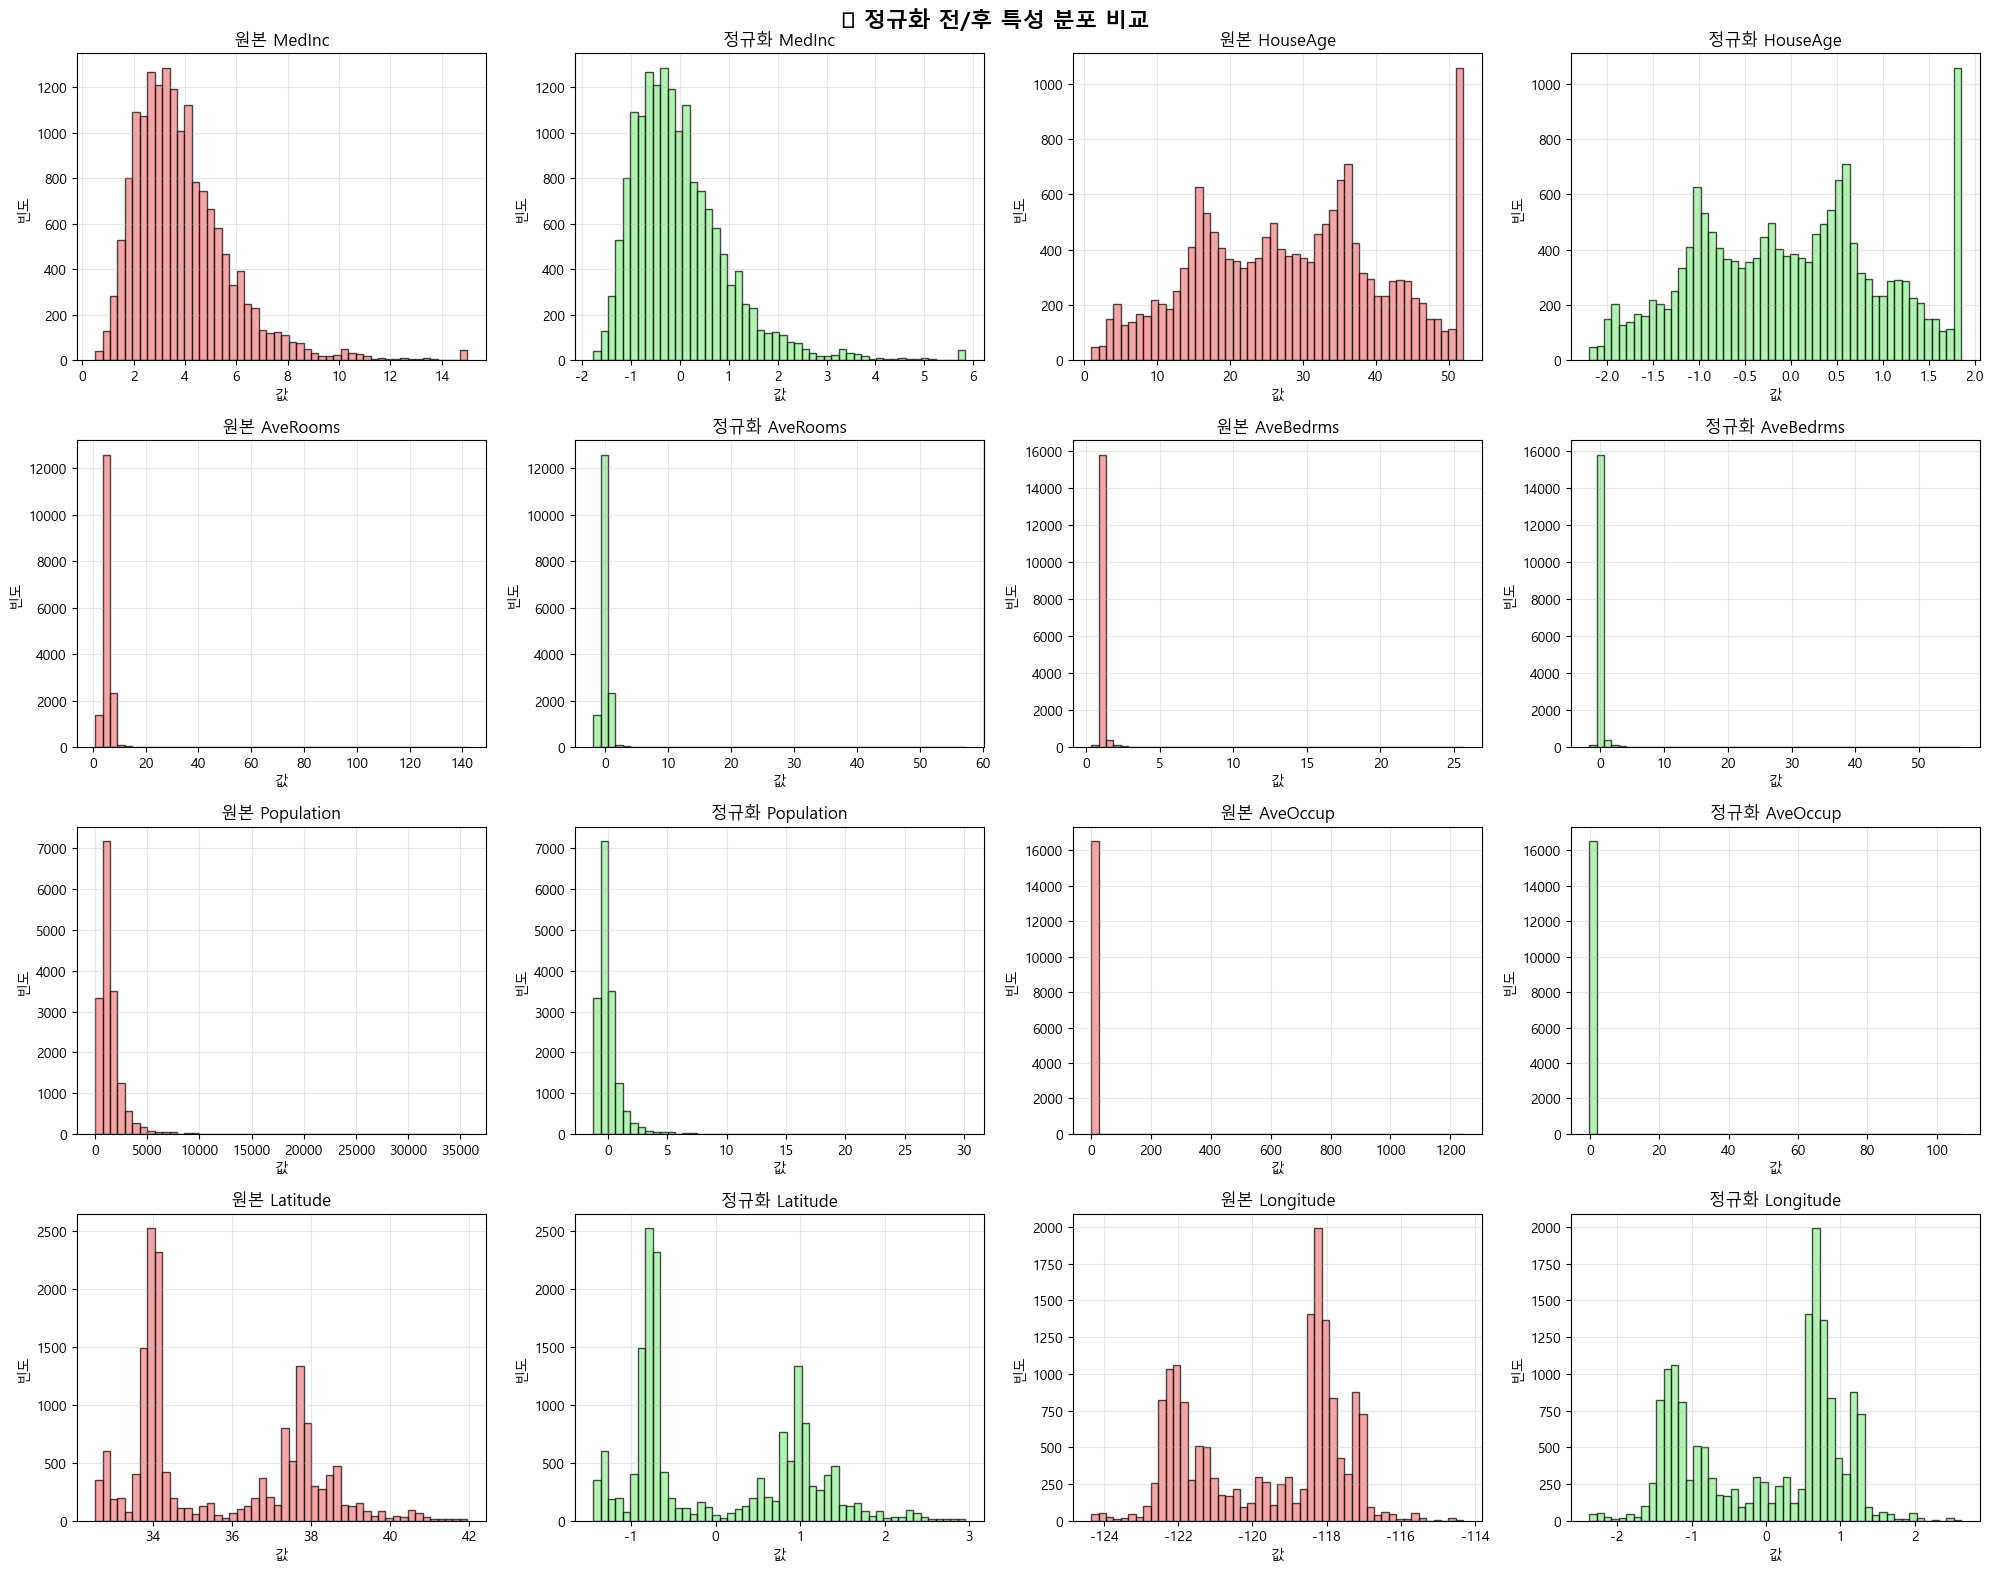

In [7]:
# 정규화 전/후 분포 비교 시각화
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle('📊 정규화 전/후 특성 분포 비교', fontsize=16, fontweight='bold')

for i, feature in enumerate(feature_names):
    row = i // 2
    col_original = (i % 2) * 2
    col_scaled = col_original + 1
    
    # 원본 데이터 분포
    axes[row, col_original].hist(X_train[:, i], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[row, col_original].set_title(f'원본 {feature}')
    axes[row, col_original].set_xlabel('값')
    axes[row, col_original].set_ylabel('빈도')
    axes[row, col_original].grid(True, alpha=0.3)
    
    # 정규화된 데이터 분포
    axes[row, col_scaled].hist(X_train_scaled[:, i], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[row, col_scaled].set_title(f'정규화 {feature}')
    axes[row, col_scaled].set_xlabel('값')
    axes[row, col_scaled].set_ylabel('빈도')
    axes[row, col_scaled].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

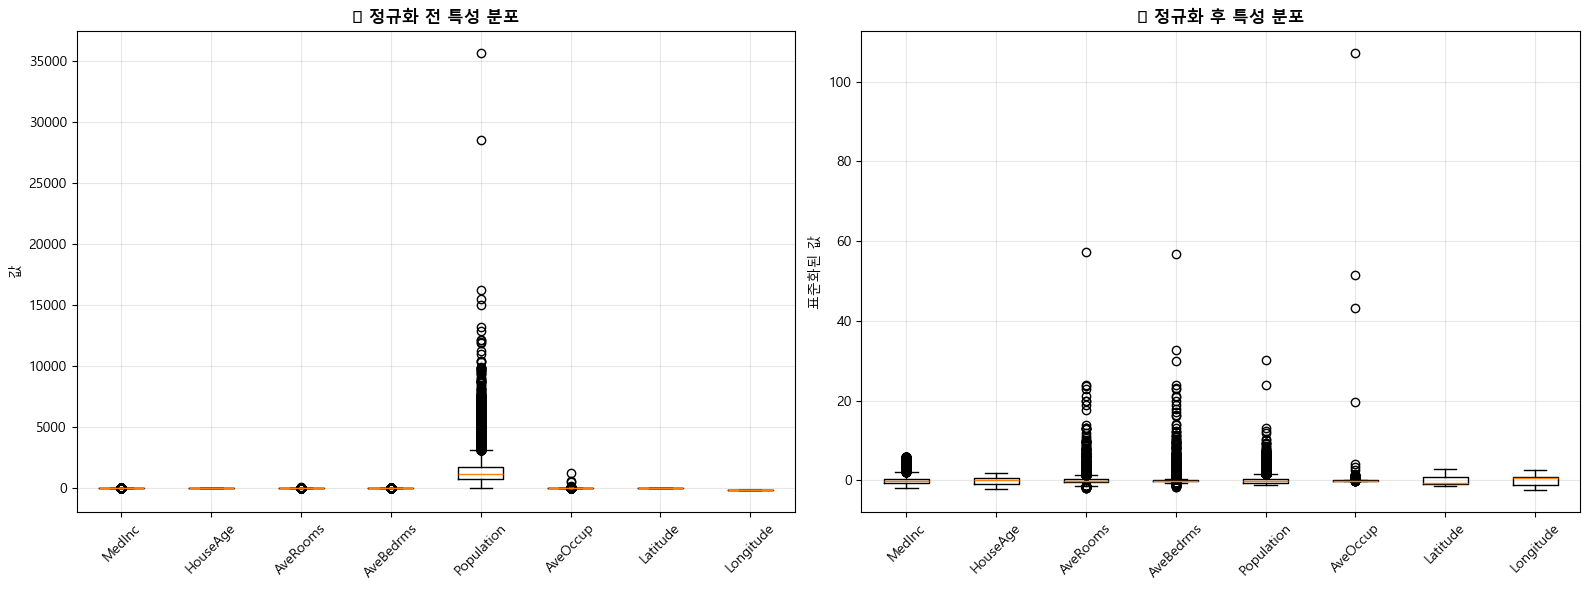

In [8]:
# 박스플롯으로 정규화 효과 확인
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 정규화 전
df_original = pd.DataFrame(X_train, columns=feature_names)
ax1.boxplot([df_original[col] for col in feature_names], labels=feature_names)
ax1.set_title('📊 정규화 전 특성 분포', fontweight='bold')
ax1.set_ylabel('값')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 정규화 후
df_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
ax2.boxplot([df_scaled[col] for col in feature_names], labels=feature_names)
ax2.set_title('🔄 정규화 후 특성 분포', fontweight='bold')
ax2.set_ylabel('표준화된 값')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4️⃣ Linear Regression 모델 성능 비교

In [9]:
# 모델 성능을 저장할 딕셔너리
results = {}

def evaluate_model(model, X_test, y_test, model_name):
    """
    모델 평가 함수
    """
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Predictions': y_pred
    }

print("🤖 Linear Regression 모델 훈련 및 평가")
print("=" * 50)

🤖 Linear Regression 모델 훈련 및 평가


In [10]:
# 1. 정규화 전 모델 훈련
print("1️⃣ 정규화 전 모델 훈련...")
start_time = time.time()

model_original = LinearRegression()
model_original.fit(X_train, y_train)

train_time_original = time.time() - start_time
results['original'] = evaluate_model(model_original, X_test, y_test, '정규화 전')
results['original']['Training_Time'] = train_time_original

print(f"   ✅ 훈련 완료 (소요시간: {train_time_original:.4f}초)")
print(f"   📊 R² Score: {results['original']['R²']:.4f}")
print(f"   📊 RMSE: {results['original']['RMSE']:.4f}")

1️⃣ 정규화 전 모델 훈련...
   ✅ 훈련 완료 (소요시간: 0.0117초)
   📊 R² Score: 0.5758
   📊 RMSE: 0.7456


In [11]:
# 2. 정규화 후 모델 훈련
print("\n2️⃣ 정규화 후 모델 훈련...")
start_time = time.time()

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

train_time_scaled = time.time() - start_time
results['scaled'] = evaluate_model(model_scaled, X_test_scaled, y_test, '정규화 후')
results['scaled']['Training_Time'] = train_time_scaled

print(f"   ✅ 훈련 완료 (소요시간: {train_time_scaled:.4f}초)")
print(f"   📊 R² Score: {results['scaled']['R²']:.4f}")
print(f"   📊 RMSE: {results['scaled']['RMSE']:.4f}")


2️⃣ 정규화 후 모델 훈련...
   ✅ 훈련 완료 (소요시간: 0.0032초)
   📊 R² Score: 0.5758
   📊 RMSE: 0.7456


In [12]:
# 성능 비교 결과 표 생성
comparison_df = pd.DataFrame([
    {
        '모델': results['original']['Model'],
        'MSE': results['original']['MSE'],
        'RMSE': results['original']['RMSE'],
        'MAE': results['original']['MAE'],
        'R²': results['original']['R²'],
        '훈련시간(초)': results['original']['Training_Time']
    },
    {
        '모델': results['scaled']['Model'],
        'MSE': results['scaled']['MSE'],
        'RMSE': results['scaled']['RMSE'],
        'MAE': results['scaled']['MAE'],
        'R²': results['scaled']['R²'],
        '훈련시간(초)': results['scaled']['Training_Time']
    }
])

print("\n📊 모델 성능 비교 결과")
print("=" * 80)
print(comparison_df.round(4))


📊 모델 성능 비교 결과
      모델     MSE    RMSE     MAE      R²  훈련시간(초)
0  정규화 전  0.5559  0.7456  0.5332  0.5758   0.0117
1  정규화 후  0.5559  0.7456  0.5332  0.5758   0.0032


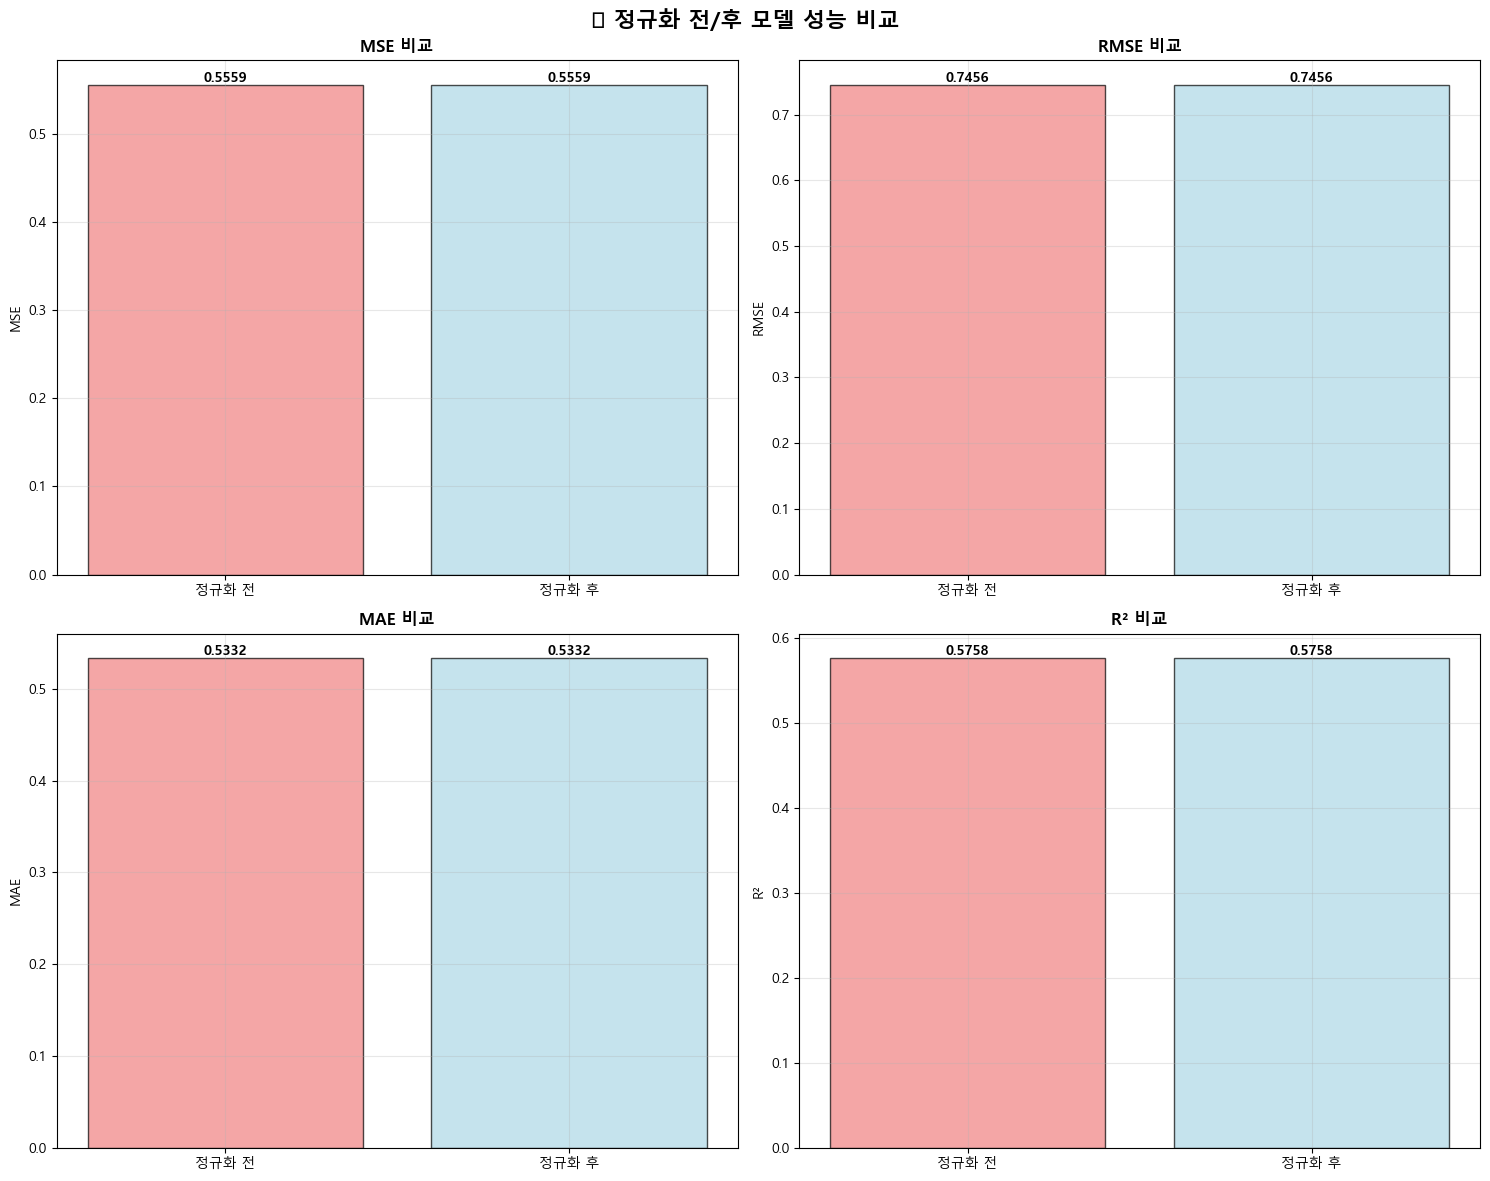

In [13]:
# 성능 지표 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 정규화 전/후 모델 성능 비교', fontsize=16, fontweight='bold')

metrics = ['MSE', 'RMSE', 'MAE', 'R²']
colors = ['lightcoral', 'lightblue']

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    values = [results['original'][metric], results['scaled'][metric]]
    labels = ['정규화 전', '정규화 후']
    
    bars = axes[row, col].bar(labels, values, color=colors, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'{metric} 비교', fontweight='bold')
    axes[row, col].set_ylabel(metric)
    axes[row, col].grid(True, alpha=0.3)
    
    # 막대 위에 값 표시
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                           f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 5️⃣ 예측 결과 비교

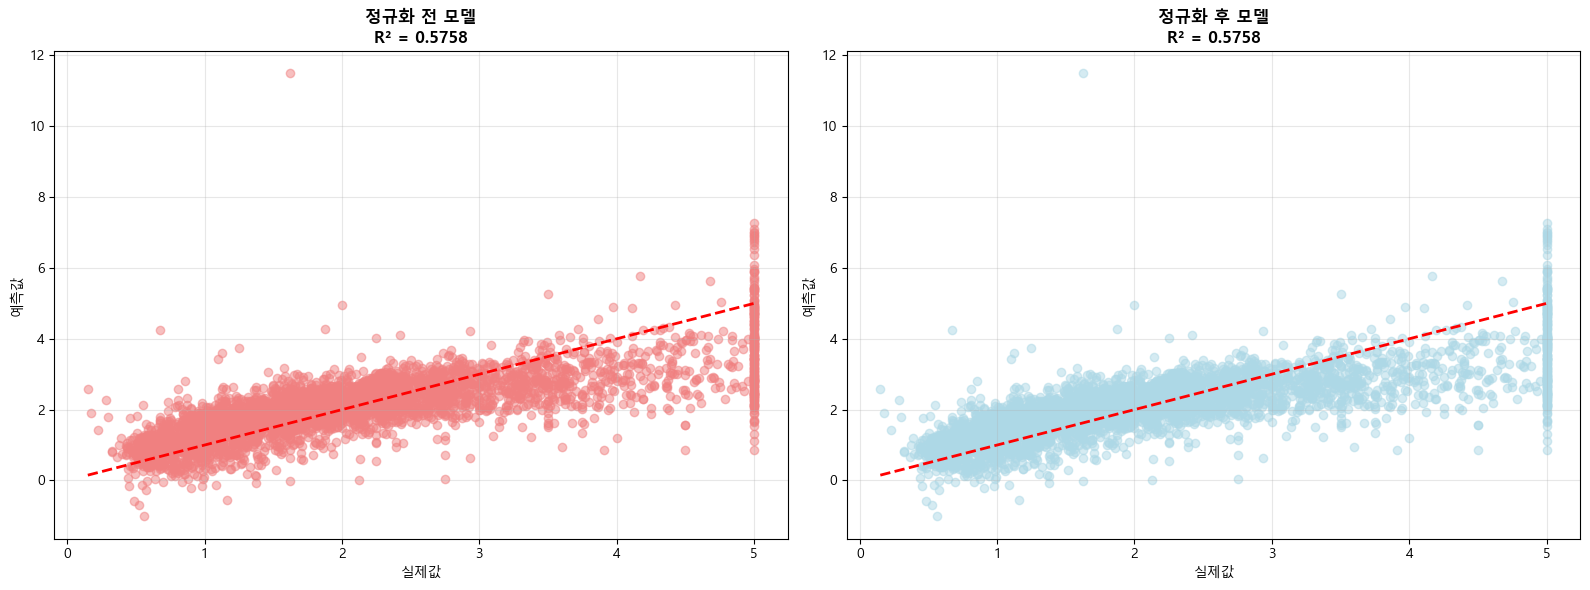

In [14]:
# 실제값 vs 예측값 산점도
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 정규화 전 모델 예측 결과
ax1.scatter(y_test, results['original']['Predictions'], alpha=0.5, color='lightcoral')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('실제값')
ax1.set_ylabel('예측값')
ax1.set_title(f'정규화 전 모델\nR² = {results["original"]["R²"]:.4f}', fontweight='bold')
ax1.grid(True, alpha=0.3)

# 정규화 후 모델 예측 결과  
ax2.scatter(y_test, results['scaled']['Predictions'], alpha=0.5, color='lightblue')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('실제값')
ax2.set_ylabel('예측값')
ax2.set_title(f'정규화 후 모델\nR² = {results["scaled"]["R²"]:.4f}', fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

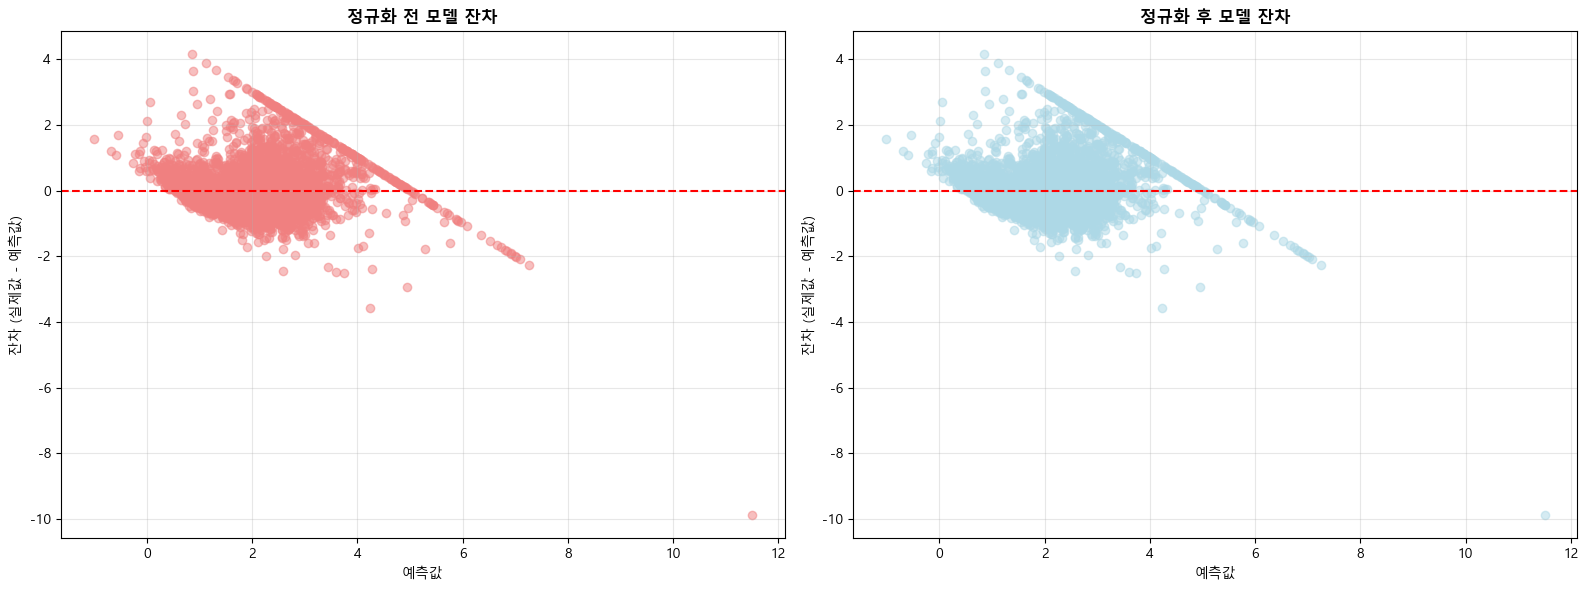

In [15]:
# 잔차(Residuals) 분석
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 정규화 전 잔차
residuals_original = y_test - results['original']['Predictions']
ax1.scatter(results['original']['Predictions'], residuals_original, alpha=0.5, color='lightcoral')
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('예측값')
ax1.set_ylabel('잔차 (실제값 - 예측값)')
ax1.set_title('정규화 전 모델 잔차', fontweight='bold')
ax1.grid(True, alpha=0.3)

# 정규화 후 잔차
residuals_scaled = y_test - results['scaled']['Predictions']
ax2.scatter(results['scaled']['Predictions'], residuals_scaled, alpha=0.5, color='lightblue')
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_xlabel('예측값')
ax2.set_ylabel('잔차 (실제값 - 예측값)')
ax2.set_title('정규화 후 모델 잔차', fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6️⃣ 모델 계수 비교

In [16]:
# 모델 계수 비교
coefficients_df = pd.DataFrame({
    '특성': feature_names,
    '정규화 전 계수': model_original.coef_,
    '정규화 후 계수': model_scaled.coef_
})

print("🔍 모델 계수 비교")
print("=" * 50)
print(coefficients_df.round(4))

print(f"\n📊 절편(Intercept) 비교")
print(f"정규화 전: {model_original.intercept_:.4f}")
print(f"정규화 후: {model_scaled.intercept_:.4f}")

🔍 모델 계수 비교
           특성  정규화 전 계수  정규화 후 계수
0      MedInc    0.4487    0.8544
1    HouseAge    0.0097    0.1225
2    AveRooms   -0.1233   -0.2944
3   AveBedrms    0.7831    0.3393
4  Population   -0.0000   -0.0023
5    AveOccup   -0.0035   -0.0408
6    Latitude   -0.4198   -0.8969
7   Longitude   -0.4337   -0.8698

📊 절편(Intercept) 비교
정규화 전: -37.0233
정규화 후: 2.0719


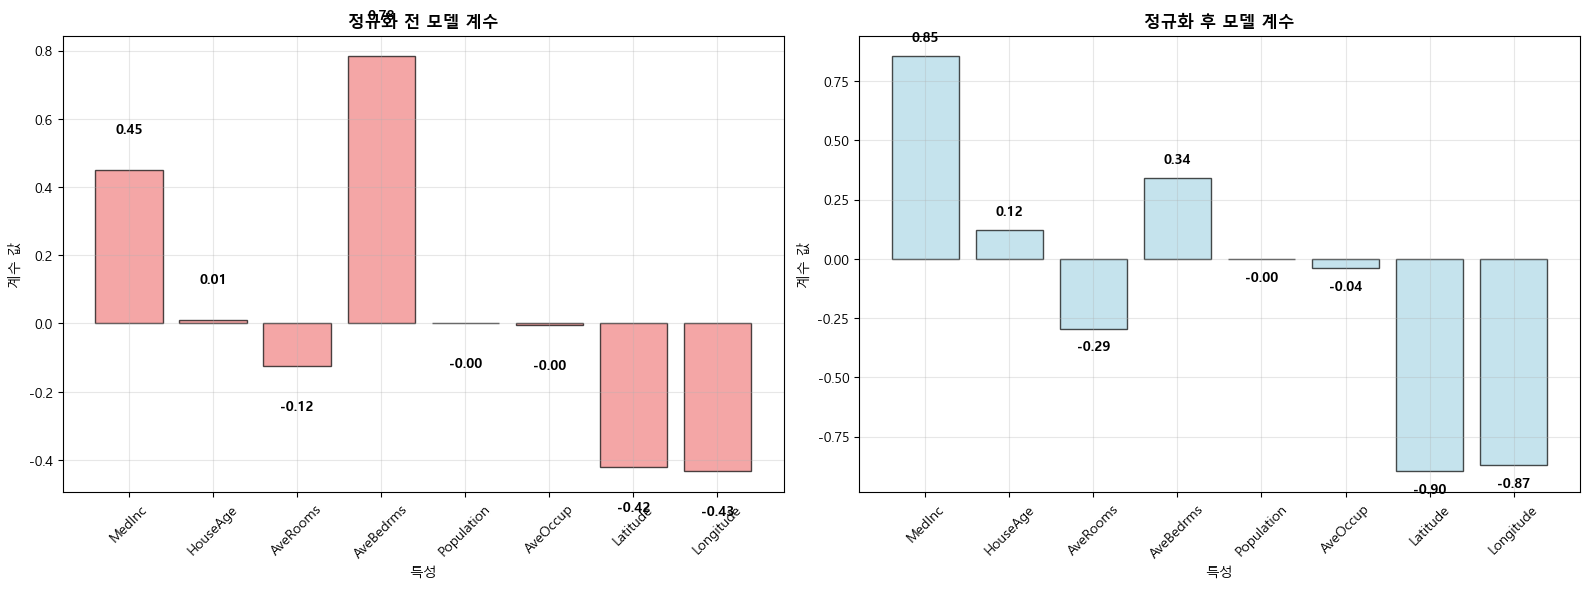

In [17]:
# 계수 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 정규화 전 계수
bars1 = ax1.bar(feature_names, model_original.coef_, color='lightcoral', alpha=0.7, edgecolor='black')
ax1.set_title('정규화 전 모델 계수', fontweight='bold')
ax1.set_xlabel('특성')
ax1.set_ylabel('계수 값')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 막대 위에 값 표시
for bar, coef in zip(bars1, model_original.coef_):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + (0.1 if height > 0 else -0.1),
             f'{coef:.2f}', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

# 정규화 후 계수
bars2 = ax2.bar(feature_names, model_scaled.coef_, color='lightblue', alpha=0.7, edgecolor='black')
ax2.set_title('정규화 후 모델 계수', fontweight='bold')
ax2.set_xlabel('특성')
ax2.set_ylabel('계수 값')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# 막대 위에 값 표시
for bar, coef in zip(bars2, model_scaled.coef_):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + (0.05 if height > 0 else -0.05),
             f'{coef:.2f}', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()

## 📋 2단계 분석 결과 요약

In [18]:
print("🎯 2단계: 정규화 효과 분석 결과 요약")
print("=" * 60)

print("\n📊 성능 지표 비교:")
print(f"• R² Score 차이: {abs(results['scaled']['R²'] - results['original']['R²']):.6f}")
print(f"• RMSE 차이: {abs(results['scaled']['RMSE'] - results['original']['RMSE']):.6f}")
print(f"• 훈련 시간 차이: {abs(results['scaled']['Training_Time'] - results['original']['Training_Time']):.6f}초")

print("\n🔍 주요 발견사항:")
if abs(results['scaled']['R²'] - results['original']['R²']) < 0.001:
    print("• Linear Regression에서 정규화는 성능에 큰 영향을 주지 않음")
    print("• 이는 Linear Regression이 스케일에 불변하는 특성 때문")
else:
    if results['scaled']['R²'] > results['original']['R²']:
        print("• 정규화 후 모델 성능이 향상됨")
    else:
        print("• 정규화 전 모델 성능이 더 좋음")

print("\n💡 정규화의 주요 효과:")
print("• 특성들의 스케일이 동일하게 조정됨 (평균=0, 표준편차=1)")
print("• 모델 계수의 해석이 더 직관적이 됨")
print("• 경사하강법 기반 알고리즘의 수렴 속도 개선 효과 기대")
print("• 정규화(Ridge/Lasso) 적용 시 필수적")

print("\n🎯 다음 단계 예고:")
print("• 3단계: Ridge, Lasso 정규화 모델 구현 및 비교")
print("• 정규화된 데이터에서 L1/L2 정규화 효과 분석")
print("• 과적합 방지 및 특성 선택 효과 확인")

🎯 2단계: 정규화 효과 분석 결과 요약

📊 성능 지표 비교:
• R² Score 차이: 0.000000
• RMSE 차이: 0.000000
• 훈련 시간 차이: 0.008508초

🔍 주요 발견사항:
• Linear Regression에서 정규화는 성능에 큰 영향을 주지 않음
• 이는 Linear Regression이 스케일에 불변하는 특성 때문

💡 정규화의 주요 효과:
• 특성들의 스케일이 동일하게 조정됨 (평균=0, 표준편차=1)
• 모델 계수의 해석이 더 직관적이 됨
• 경사하강법 기반 알고리즘의 수렴 속도 개선 효과 기대
• 정규화(Ridge/Lasso) 적용 시 필수적

🎯 다음 단계 예고:
• 3단계: Ridge, Lasso 정규화 모델 구현 및 비교
• 정규화된 데이터에서 L1/L2 정규화 효과 분석
• 과적합 방지 및 특성 선택 효과 확인
